In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import ants

In [3]:
%run ./../../preprocessing/metrics/metrics.py

FileNotFoundError: [Errno 2] No such file or directory: '/anvar/public_datasets/preproc_study/gbm/inference/gbm_3a_atlas_spacing'

## Calculate difference in labels:

In [31]:
ants.image_read('./../main_pipeline/utils/sri24_T1.nii')

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, 129.0, -68.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [17]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/1_reg_ss_shared/TCGA-02-0086')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'CT1_SEG.nii.gz',
 'CT1_mask.nii.gz',
 'CT1.nii.gz']

In [52]:
ss_shared = ants.image_read('/anvar/public_datasets/preproc_study/gbm/1_reg_ss_shared/TCGA-12-0616/CT1_SEG.nii.gz')
ss_orig = ants.image_read('/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-12-0616/CT1_SEG.nii.gz').reorient_image2('RPI')

In [53]:
ss_shared

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 176, 256)
	 Spacing    : (0.8594, 1.25, 0.8594)
	 Origin     : (-85.2119, 58.9149, -80.7145)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [54]:
ss_orig 

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 176, 256)
	 Spacing    : (0.8594, 1.25, 0.8594)
	 Origin     : (-85.2119, 58.9149, -80.7145)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

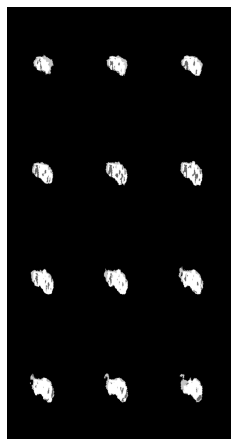

In [55]:
ants.plot(ss_shared)

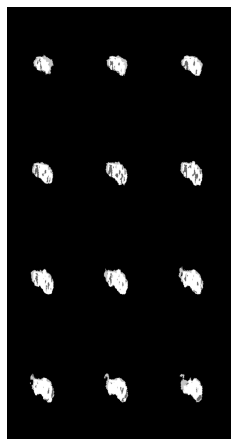

In [56]:
ants.plot(ss_orig)

### считаем ошибку в мл только для 1 класса

In [34]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/')

['dicom',
 'ss_indiv_reg',
 '3a_atlas',
 'orig',
 '3b_n4',
 '5_ss_shared',
 '3d_susan',
 '3c_n4_susan',
 '1_reg_ss_shared',
 '2b_n4',
 '4a_resamp',
 '2c_n4_susan',
 'folders_description.md',
 'meta.csv',
 '1_reg',
 'orig_ss_indiv',
 '6_hist',
 'inference',
 '1_reg_ss_indiv']

In [60]:
volumes = []
errors = []
patients = []

for path in os.listdir('/anvar/public_datasets/preproc_study/gbm/3a_atlas/'):
    ss_shared = ants.image_read('/anvar/public_datasets/preproc_study/gbm/5_ss_shared//'+path+'/CT1_SEG.nii.gz')
    ss_mask = ants.image_read('/anvar/public_datasets/preproc_study/gbm/5_ss_shared/'+path+'/CT1_mask.nii.gz')
    ss_orig = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/'+path+'/CT1_SEG.nii.gz').reorient_image2('RPI')
    masked_label = (ss_shared[:,:,:]>1)*(ss_mask[:,:,:]==1)*1
    label = (ss_orig[:,:,:]>1)*1
    volumes.append(label.sum())
    errors.append(label.sum() - (masked_label).sum())
    
    patients.append(path)
    print(path)

TCGA-02-0086
TCGA-02-0102
TCGA-02-0059
TCGA-02-0069
TCGA-19-2624
TCGA-06-0182
TCGA-08-0360
TCGA-02-0006
TCGA-19-2631
TCGA-12-1094
TCGA-06-2570
TCGA-06-0119
TCGA-06-0145
TCGA-08-0509
TCGA-06-5408
TCGA-02-0116
TCGA-06-0188
TCGA-76-6661
TCGA-02-0047
TCGA-12-3650
TCGA-02-0064
TCGA-14-1825
TCGA-06-0162
TCGA-02-0033
TCGA-08-0359
TCGA-02-0054
TCGA-06-0184
TCGA-12-1601
TCGA-06-5413
TCGA-76-6191
TCGA-02-0075
TCGA-06-0177
TCGA-06-0154
TCGA-06-0179
TCGA-19-5951
TCGA-12-1598
TCGA-12-0616
TCGA-02-0070
TCGA-06-1084
TCGA-12-0829
TCGA-76-4932
TCGA-02-0068
TCGA-76-6282
TCGA-08-0385
TCGA-12-1098
TCGA-08-0512
TCGA-08-0389
TCGA-14-1794
TCGA-19-1789
TCGA-02-0009
TCGA-06-0122
TCGA-08-0355
TCGA-06-6389
TCGA-06-0190
TCGA-06-0192
TCGA-02-0027
TCGA-06-0137
TCGA-12-0776
TCGA-76-6657
TCGA-06-0176
TCGA-08-0356
TCGA-76-6662
TCGA-08-0522
TCGA-06-1802
TCGA-19-5960
TCGA-08-0390
TCGA-14-1456
TCGA-06-0158
TCGA-06-0139
TCGA-06-0238
TCGA-76-4935
TCGA-14-3477
TCGA-02-0106
TCGA-06-0644
TCGA-19-0963
TCGA-06-0187
TCGA-76-6664

ValueError: File /anvar/public_datasets/preproc_study/gbm/5_ss_shared//logging.txt/CT1_SEG.nii.gz does not exist!

In [50]:
np.where(np.array(errors) == np.array(errors).max())

(array([36]),)

In [51]:
patients[36]

'TCGA-12-0616'

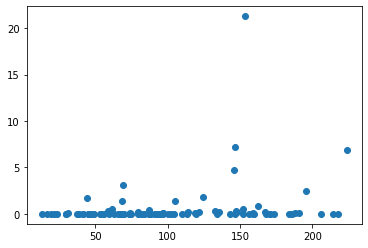

In [65]:
plt.scatter(np.array(volumes)/1000, np.array(errors)/1000)

In [66]:
np.array(errors).mean(), np.std(np.array(errors))

(584.959595959596, 2397.7147492079894)

In [57]:
err_on_vol = np.array(errors)/np.array(volumes)

/tmp/ipykernel_2806510/1381034124.py:1: RuntimeWarning:

invalid value encountered in true_divide



In [59]:
err_on_vol.std()

nan

In [28]:
metrics.compute_dice_coefficient(ss_orig[:,:,:]==1, ss_shared[:,:,:]==1)

1.0

In [29]:
((ss_orig[:,:,:]==1).sum() - (ss_shared[:,:,:]==1).sum())/(ss_orig[:,:,:]==1).sum()

0.0

In [ ]:
path_orig = '/anvar/public_datasets/preproc_study/gbm/orig'
path_ss = '/anvar/public_datasets/preproc_study/gbm/orig'
path_schw = '/anvar/public_datasets/preproc_study/schw/orig'

In [ ]:
for path in [list_gbm, list_schw, list_bgpd]:
    dices = []
    s_dices = []
    for image_path in tqdm(path):
        try:
            dice, s_dice = measure_resample(image_path, plot = False)
            dices.append(dice)
            s_dices.append(s_dice)
        except Exception as e:
            print(e)
            print(' For patient ', image_path.split('/')[-2],', there is size mismatch')
            pass 
        
    print(path[0].split('/')[-4], len(dices), 'Dice: ',
          np.round(np.array(dices).mean(),3), 
          np.round(np.array(dices).std(),3), 'Surf. Dice: ',
          np.round(np.array(s_dices).mean(),3), np.round(np.array(s_dices).std(),3))

In [42]:
def resample_by_channels(img, channels = [1,2,3], interpolator = 0):
    # empty array
    img_res = ants.resample_image(img, (1, 1, 1), False, interpolator)
    result_arr = np.zeros_like(img_res.numpy())

    for channel in channels:
        # float is needed by ants to save an image
        temp_img = img.new_image_like((img[:,:,:] == int(channel))*float(channel))
        temp_img_res = ants.resample_image(temp_img, (1, 1, 1), False, interpolator)
        temp_arr = np.round(temp_img_res.numpy(), 0)
        result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)
    img_res =  img_res.new_image_like(result_arr)
    return img_res

def invert_resample_by_channels(img_res, img_orig, channels = [1,2,3], interpolator = 0):
    img_res_inv = ants.resample_image(img_res, img_orig.spacing, False, interpolator)
    result_arr = np.zeros_like(img_res_inv.numpy())

    for channel in channels:
    # for each label in labels separately
        temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
        temp_img_res = ants.resample_image(temp_img, img_orig.spacing, False, interpolator)
        temp_arr = np.round(temp_img_res.numpy(), 0)
        result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)

    img_res_reverse = img_res_inv.new_image_like(result_arr)
    return img_res_reverse

def invert_registrate_by_channels(img_res, img_orig, channels = [1,2,3], interpolator = 'Rigid'):
    result_arr = np.zeros_like(img_orig.numpy())
    
    registration = ants.registration(fixed = img_orig, moving = img_res, type_of_transform = interpolator)   
    for channel in channels:
    # for each label in labels separately
        temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
        temp_img_res = ants.apply_transforms(img_orig, temp_img, transformlist = registration['fwdtransforms'][0])
#         print(temp_img_res.shape)
        temp_arr = np.round(temp_img_res.numpy(), 0)
        result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)
        
    img_res_reverse = img_orig.new_image_like(result_arr)
    return img_res_reverse

def resample_to_spacing_by_channels(img_res, img_orig, channels = [1,2,3], interpolator = 0):
    result_arr = np.zeros_like(img_orig.numpy())

    for channel in channels:
    # for each label in labels separately
        temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
        temp_img_res = ants.resample_image(temp_img, img_orig.shape, True, interpolator)
        temp_arr = np.round(temp_img_res.numpy(), 0)
        result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)
        
    img_res_reverse = img_orig.new_image_like(result_arr)
    return img_res_reverse

In [71]:
def plot_qc(image, mask, patient_id= 'lol'):
    fig, axs = plt.subplots(1,3,figsize=(8,8))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    axs[0].imshow(image[..., idx[0]], cmap='gray')
    axs[1].imshow(mask[..., idx[0]], cmap='gray')
    axs[2].imshow(image[..., idx[0]]*1- mask[..., idx[0]]*1, cmap='gray')
    axs[0].set_title(patient_id)
    plt.tight_layout()
    plt.plot()

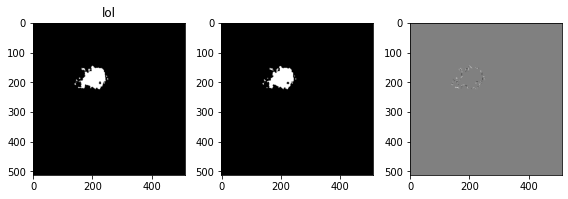

In [72]:
plot_qc(img[:,:,:]==1, img_res_reverse[:,:,:]==1)

DICE 0.903 Surf DICE 0.985


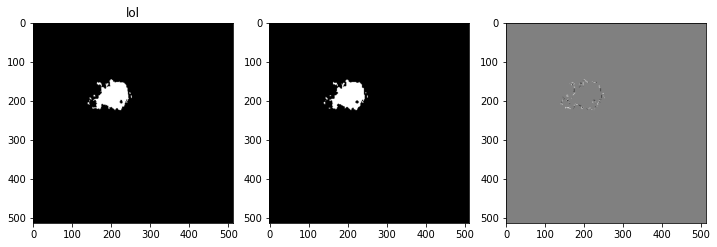

In [54]:
interpolator = 0

path = '/anvar/public_datasets/preproc_study/gbm/orig'
img = ants.image_read(path + '/TCGA-02-0059/' + 'CT1_SEG.nii.gz')

img_res = resample_by_channels(img)
img_res_reverse = invert_resample_by_channels(img_res, img)

distances = metrics.compute_surface_distances((img[:,:,:]==channel),
                                              (img_res_reverse[:,:,:]==channel), 
                                              img.spacing)
dice = metrics.compute_dice_coefficient((img[:,:,:]==channel), 
                                        (img_res_reverse[:,:,:]==channel))
s_dice = metrics.compute_surface_dice_at_tolerance(distances, 1)

print('DICE', np.round(dice,3), "Surf DICE", np.round(s_dice,3))
plot_qc(img[:,:,:]==1, img_res_reverse[:,:,:]==1)

### Resampling investigation strategy:

1. Choose test set, 20 images from each dataset will be enough
2. Write funtion, that will write metrics calculation and plotting

In [226]:
from glob2 import glob

path_gbm = '/anvar/public_datasets/preproc_study/gbm/orig'
path_bgpd = '/anvar/public_datasets/preproc_study/bgpd/orig'
path_schw = '/anvar/public_datasets/preproc_study/schw/orig'

list_gbm = glob(path_gbm + '/**/CT1_SEG.nii.gz')
list_bgpd = glob(path_bgpd + '/**/mask_GTV_FLAIR.nii.gz')
list_schw = glob(path_schw + '/**/T1_SEG.nii.gz')

In [234]:
# checking for right labels

for img_path in tqdm(list_gbm):
    img_orig = ants.image_read(img_path)
    channels = np.unique(img_orig.numpy())[1:]
    if channels[0] != 1:
        print(img_path)
        print('weird channels', channels)
        result_arr = img_orig.numpy()
        result_arr[result_arr == channels[0]] = int(1)
        result_arr[result_arr == channels[1]] = int(2)
        result_arr[result_arr == channels[2]] = int(3)
        img_new = img_orig.new_image_like(result_arr)
        print(np.unique(img_new.numpy())[1:])
#         os.remove(img_path)
#         ants.image_write(img_new, img_path, ri=False);

 19%|█▊        | 19/102 [00:04<00:13,  6.17it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6661/CT1_SEG.nii.gz
weird channels [1.560928 4.682784 6.243712]
[1. 2. 3.]


 46%|████▌     | 47/102 [00:12<00:18,  2.94it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-14-1794/CT1_SEG.nii.gz
weird channels [2.5308914 5.061783  7.5926743]


 47%|████▋     | 48/102 [00:13<00:21,  2.55it/s]

[1. 2. 3.]


 59%|█████▉    | 60/102 [00:18<00:12,  3.36it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6657/CT1_SEG.nii.gz
weird channels [3.2803419 6.5606837 9.841025 ]
[1. 2. 3.]


 61%|██████    | 62/102 [00:18<00:10,  3.95it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6662/CT1_SEG.nii.gz
weird channels [1.8251526 3.6503053 5.475458 ]
[1. 2. 3.]


 70%|██████▉   | 71/102 [00:21<00:13,  2.26it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-4935/CT1_SEG.nii.gz
weird channels [1.4778999 2.9557998 4.4336996]
[1. 2. 3.]


 76%|███████▋  | 78/102 [00:23<00:05,  4.19it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6664/CT1_SEG.nii.gz
weird channels [1.8178266 3.6356533 5.45348  ]
[1. 2. 3.]
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6663/CT1_SEG.nii.gz
weird channels [ 3.823199  7.646398 11.469597]
[1. 2. 3.]


 78%|███████▊  | 80/102 [00:23<00:04,  4.86it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-4934/CT1_SEG.nii.gz
weird channels [1.524298 3.048596 4.572894]
[1. 2. 3.]


 95%|█████████▌| 97/102 [00:31<00:02,  2.15it/s]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6656/CT1_SEG.nii.gz
weird channels [1.9323565 3.864713  5.7970695]
[1. 2. 3.]


100%|██████████| 102/102 [00:32<00:00,  3.11it/s]


In [297]:
img

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (320, 320, 30)
	 Spacing    : (0.75, 0.75, 5.0)
	 Origin     : (-151.8693, 42.3235, -111.3022)
	 Direction  : [ 0.9634  0.268  -0.0109  0.2634 -0.9377  0.2268 -0.0506  0.2213  0.9739]

In [295]:
def measure_resample(path_to_img, plot = True):
    
    def resample_by_channels(img, 
                             channels = [1,2,3], 
                             interpolator = 0):
    # empty array
        img_res = ants.resample_image(img, (1, 1, 1), False, interpolator)
        result_arr = np.zeros_like(img_res.numpy())

        for channel in channels:
            # float is needed by ants to save an image
            temp_img = img.new_image_like((img[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, (1, 1, 1), False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)
            
        img_res =  img_res.new_image_like(result_arr)
        return img_res

    def invert_resample_by_channels(img_res,
                                    img_orig,
                                    channels = [1,2,3], 
                                    interpolator = 0):
        result_arr = np.zeros_like(img_orig.numpy())
        for channel in channels:
        # for each label in labels separately
            temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, img_orig.spacing, False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            temp_arr = (temp_arr[:,:,:] == int(channel))*float(channel)
            result_arr += temp_arr[:img_orig.shape[0],:img_orig.shape[1],:img_orig.shape[2]]

        if np.shape(temp_arr) != img_orig.shape:
            print('Different shapes ', np.shape(result_arr),img_orig.shape )
        img_res_reverse = img_orig.new_image_like(result_arr)
        
        return img_res_reverse


    img = ants.image_read(path_to_img)
    
    channels = np.unique(img.numpy())[1:]
    if channels[0] != 1:
        print(img_path)
        print('Untypical channels', channels)
        result_arr = img.numpy()
        result_arr[result_arr == channels[0]] = int(1)
        result_arr[result_arr == channels[1]] = int(2)
        result_arr[result_arr == channels[2]] = int(3)
        img_new = img.new_image_like(result_arr)
        img = img_new
        channels = [1,2,3]
    
    img_res = resample_by_channels(img)
    img_res_reverse = invert_resample_by_channels(img_res, img)
    channel = channels[0]
    
    distances = metrics.compute_surface_distances((img[:,:,:]==channel),
                                              (img_res_reverse[:,:,:]==channel), 
                                              img.spacing)
    dice = metrics.compute_dice_coefficient((img[:,:,:]==channel), 
                                            (img_res_reverse[:,:,:]==channel))
    s_dice = metrics.compute_surface_dice_at_tolerance(distances, 1)
#     print('DICE', np.round(dice,3), "Surf DICE", np.round(s_dice,3))
    
    if plot:
        plot_qc(img[:,:,:]==channel, img_res_reverse[:,:,:]==channel)
        plt.show()
    return dice, s_dice

In [311]:
np.shape(channels)[0]

3

In [312]:
def measure_resample(path_to_img, plot = True):
    
    def check_multiple_channels(path_to_img):
        """check that for Untypical channels, like [ 3.823199  7.646398 11.469597].
        This happens on GBM or LGG datasets, with multichanel target, after registration.
        """
        img = ants.image_read(path_to_img)

        channels = np.unique(img.numpy())[1:]
        if np.shape(channels)[0] > 1:
            if channels[0] != 1:
                print(img_path)
                print('Untypical channels', channels)
                result_arr = img.numpy()
                result_arr[result_arr == channels[0]] = int(1)
                result_arr[result_arr == channels[1]] = int(2)
                result_arr[result_arr == channels[2]] = int(3)
                img_new = img.new_image_like(result_arr)
                img = img_new
                channels = [1,2,3]

        return(img , channels)

    def resample_by_channels(img, 
                             channels = [1,2,3], 
                             interpolator = 0):
    # empty array
        img_res = ants.resample_image(img, (1, 1, 1), False, interpolator)
        result_arr = np.zeros_like(img_res.numpy())

        for channel in channels:
            # float is needed by ants to save an image
            temp_img = img.new_image_like((img[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, (1, 1, 1), False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)
            
        img_res =  img_res.new_image_like(result_arr)
        return img_res

    def invert_resample_by_channels(img_res,
                                    img_orig,
                                    channels = [1,2,3], 
                                    interpolator = 0):
        result_arr = np.zeros_like(img_orig.numpy())
        for channel in channels:
        # for each label in labels separately
            temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, img_orig.spacing, False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            temp_arr = (temp_arr[:,:,:] == int(channel))*float(channel)
            result_arr += temp_arr[:img_orig.shape[0],:img_orig.shape[1],:img_orig.shape[2]]

        if np.shape(temp_arr) != img_orig.shape:
            print('Different shapes ', np.shape(result_arr), img_orig.shape )
        img_res_reverse = img_orig.new_image_like(result_arr)
        
        return img_res_reverse


    img, channels = check_multiple_channels(path_to_img)
    
    img_res = resample_by_channels(img)
    img_res_reverse = invert_resample_by_channels(img_res, img)
    channel = channels[0]
    
    distances = metrics.compute_surface_distances((img[:,:,:]==channel),
                                              (img_res_reverse[:,:,:]==channel), 
                                              img.spacing)
    dice = metrics.compute_dice_coefficient((img[:,:,:]==channel), 
                                            (img_res_reverse[:,:,:]==channel))
    s_dice = metrics.compute_surface_dice_at_tolerance(distances, 1)
#     print('DICE', np.round(dice,3), "Surf DICE", np.round(s_dice,3))
    
    if plot:
        plot_qc(img[:,:,:]==channel, img_res_reverse[:,:,:]==channel)
        plt.show()
    return dice, s_dice

In [254]:
def invert_resample_by_channels(img_res,
                                    img_orig,
                                    channels = [1,2,3], 
                                    interpolator = 0):
        result_arr = np.zeros_like(img_orig.numpy())
        for channel in channels:
        # for each label in labels separately
            temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, img_orig.spacing, False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            result_arr[:temp_arr.shape[0],:temp_arr.shape[1],:temp_arr.shape[2]] += (temp_arr[:,:,:] == int(channel))*float(channel)
        print(np.unique(temp_arr))
        print( np.shape(temp_arr),img_orig.shape )
#         result_arr = result_arr[:img_orig.shape[0],:img_orig.shape[1],:img_orig.shape[2]]
        print( np.shape(result_arr),img_orig.shape )

        img_res_reverse = img_orig.new_image_like(result_arr)
        return img_res_reverse

In [237]:
list_gbm = glob(path_gbm + '/**/CT1_SEG.nii.gz')[::5][:20]
list_bgpd = glob(path_bgpd + '/**/mask_GTV_FLAIR.nii.gz')[::9]
list_schw = glob(path_schw + '/**/T1_SEG.nii.gz')[::12][:20]
len(list_schw), len(list_bgpd), len(list_gbm)

(20, 20, 20)

  0%|          | 0/92 [00:00<?, ?it/s]

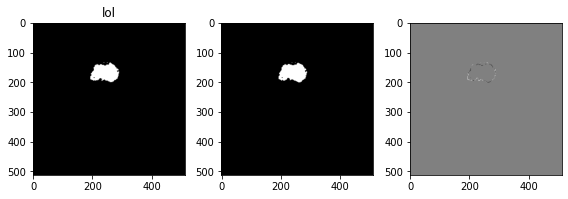

  1%|          | 1/92 [00:12<19:23, 12.78s/it]

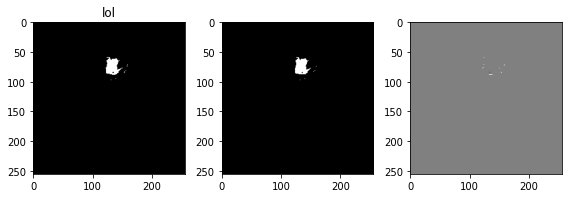

  2%|▏         | 2/92 [00:16<15:13, 10.15s/it]

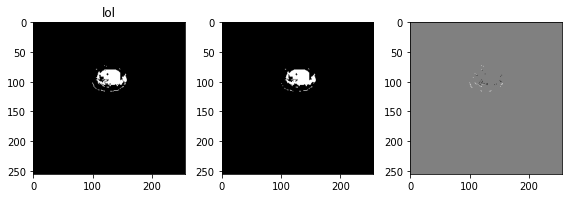

  3%|▎         | 3/92 [00:21<10:25,  7.03s/it]


KeyboardInterrupt: 

In [313]:
from tqdm import tqdm
for path in [list_gbm[10:], list_schw, list_bgpd]:
    dices = []
    s_dices = []
    for image_path in tqdm(path):
        try:
            dice, s_dice = measure_resample(image_path, plot = True)
            dices.append(dice)
            s_dices.append(s_dice)
        except Exception as e:
            print(e)
            print(' For patient ', image_path.split('/')[-2],', there is size mismatch')
            pass 
        
    print(path[0].split('/')[-4], len(dices), 'Dice: ',
          np.round(np.array(dices).mean(),3), 
          np.round(np.array(dices).std(),3), 'Surf. Dice: ',
          np.round(np.array(s_dices).mean(),3), np.round(np.array(s_dices).std(),3))

## Final measures:

In [294]:
list_gbm = glob(path_gbm + '/**/CT1_SEG.nii.gz')
list_bgpd = glob(path_bgpd + '/**/mask_GTV_FLAIR.nii.gz')
list_schw = glob(path_schw + '/**/T1_SEG.nii.gz')
len(list_schw), len(list_bgpd), len(list_gbm)

(242, 180, 102)

In [296]:
for path in [list_gbm, list_schw, list_bgpd]:
    dices = []
    s_dices = []
    for image_path in tqdm(path):
        try:
            dice, s_dice = measure_resample(image_path, plot = False)
            dices.append(dice)
            s_dices.append(s_dice)
        except Exception as e:
            print(e)
            print(' For patient ', image_path.split('/')[-2],', there is size mismatch')
            pass 
        
    print(path[0].split('/')[-4], len(dices), 'Dice: ',
          np.round(np.array(dices).mean(),3), 
          np.round(np.array(dices).std(),3), 'Surf. Dice: ',
          np.round(np.array(s_dices).mean(),3), np.round(np.array(s_dices).std(),3))

  9%|▉         | 9/102 [00:51<06:44,  4.35s/it]

Different shapes  (192, 256, 28) (192, 256, 28)


 17%|█▋        | 17/102 [01:29<05:51,  4.13s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.560928 4.682784 6.243712]


 22%|██▏       | 22/102 [01:58<08:20,  6.25s/it]

Different shapes  (240, 320, 27) (240, 320, 27)


 27%|██▋       | 28/102 [02:18<04:34,  3.71s/it]

Different shapes  (320, 384, 24) (320, 384, 24)


 34%|███▍      | 35/102 [02:58<05:44,  5.14s/it]

Different shapes  (240, 320, 31) (240, 320, 31)


 35%|███▌      | 36/102 [02:59<04:28,  4.07s/it]

Different shapes  (192, 256, 20) (192, 256, 20)


 39%|███▉      | 40/102 [03:14<03:37,  3.50s/it]

Different shapes  (384, 512, 23) (384, 512, 23)


 43%|████▎     | 44/102 [03:42<06:47,  7.02s/it]

Different shapes  (512, 448, 72) (512, 448, 72)


 46%|████▌     | 47/102 [04:04<06:23,  6.98s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [2.5308914 5.061783  7.5926743]


 57%|█████▋    | 58/102 [05:28<05:25,  7.39s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [3.2803419 6.5606837 9.841025 ]


 60%|█████▉    | 61/102 [05:42<03:56,  5.78s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.8251526 3.6503053 5.475458 ]


 69%|██████▊   | 70/102 [06:39<04:41,  8.81s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.4778999 2.9557998 4.4336996]


 71%|███████   | 72/102 [06:46<03:03,  6.13s/it]

Different shapes  (480, 512, 25) (480, 512, 25)


 75%|███████▍  | 76/102 [07:07<02:14,  5.19s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.8178266 3.6356533 5.45348  ]


 75%|███████▌  | 77/102 [07:09<01:47,  4.30s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [ 3.823199  7.646398 11.469597]


 77%|███████▋  | 79/102 [07:14<01:16,  3.34s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.524298 3.048596 4.572894]


 94%|█████████▍| 96/102 [09:27<00:56,  9.47s/it]

/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.9323565 3.864713  5.7970695]


  0%|          | 0/242 [00:00<?, ?it/s]

gbm 102 Dice:  0.932 0.082 Surf. Dice:  0.982 0.022


  0%|          | 0/180 [00:00<?, ?it/s]

schw 242 Dice:  0.963 0.017 Surf. Dice:  1.0 0.0


  5%|▌         | 9/180 [01:14<20:23,  7.16s/it]

Different shapes  (288, 288, 79) (288, 288, 79)


  7%|▋         | 13/180 [01:35<15:57,  5.73s/it]

Different shapes  (592, 640, 28) (592, 640, 28)


 26%|██▌       | 47/180 [07:55<31:34, 14.25s/it]

operands could not be broadcast together with shapes (512,512,272) (512,512,271) (512,512,272) 
 For patient  1036_18 , there is size mismatch


 29%|██▉       | 52/180 [08:49<25:36, 12.01s/it]

operands could not be broadcast together with shapes (224,224,28) (223,223,28) (224,224,28) 
 For patient  Patient_129816 , there is size mismatch


 29%|██▉       | 53/180 [09:23<39:27, 18.64s/it]

operands could not be broadcast together with shapes (512,512,272) (512,512,271) (512,512,272) 
 For patient  1795_18_ , there is size mismatch


 37%|███▋      | 67/180 [11:20<28:11, 14.97s/it]

operands could not be broadcast together with shapes (512,512,272) (512,512,271) (512,512,272) 
 For patient  1333_18 , there is size mismatch


 39%|███▉      | 71/180 [12:37<33:32, 18.47s/it]

Different shapes  (512, 512, 296) (512, 512, 296)


 41%|████      | 74/180 [13:36<28:31, 16.15s/it]

Different shapes  (192, 256, 22) (192, 256, 22)


 49%|████▉     | 88/180 [16:41<31:57, 20.84s/it]

operands could not be broadcast together with shapes (512,512,272) (512,512,271) (512,512,272) 
 For patient  826_18_4 , there is size mismatch


 60%|██████    | 108/180 [20:37<25:53, 21.58s/it]

operands could not be broadcast together with shapes (512,512,272) (512,512,271) (512,512,272) 
 For patient  1257_18 , there is size mismatch


 69%|██████▉   | 125/180 [24:08<06:18,  6.89s/it]

Different shapes  (512, 512, 296) (512, 512, 296)


 73%|███████▎  | 131/180 [25:44<10:22, 12.71s/it]

operands could not be broadcast together with shapes (448,512,22) (447,512,22) (448,512,22) 
 For patient  Patient_716 , there is size mismatch


 77%|███████▋  | 139/180 [27:15<09:22, 13.72s/it]

operands could not be broadcast together with shapes (512,512,232) (512,512,231) (512,512,232) 
 For patient  1214_18 , there is size mismatch


 79%|███████▉  | 143/180 [27:33<03:57,  6.42s/it]

Different shapes  (280, 320, 33) (280, 320, 33)


 80%|████████  | 144/180 [27:37<03:18,  5.53s/it]

Different shapes  (384, 512, 27) (384, 512, 27)


 84%|████████▍ | 151/180 [28:51<05:08, 10.63s/it]

operands could not be broadcast together with shapes (640,592,70) (639,592,70) (640,592,70) 
 For patient  573_18_4 , there is size mismatch


 85%|████████▌ | 153/180 [29:00<03:26,  7.64s/it]

Different shapes  (512, 512, 296) (512, 512, 296)


 95%|█████████▌| 171/180 [33:43<01:42, 11.36s/it]

operands could not be broadcast together with shapes (448,512,22) (447,512,22) (448,512,22) 
 For patient  Patient_146716 , there is size mismatch


 96%|█████████▌| 173/180 [33:55<00:58,  8.41s/it]

Different shapes  (512, 512, 296) (512, 512, 296)


100%|██████████| 180/180 [36:42<00:00, 12.24s/it]

bgpd 169 Dice:  0.988 0.007 Surf. Dice:  0.999 0.002


### Check the quality of resampling

In [338]:
def check_multiple_channels(path_to_img):
        """check that for Untypical channels, like [ 3.823199  7.646398 11.469597].
        This happens on GBM or LGG datasets, with multichanel target, after registration.
        """
        img = ants.image_read(path_to_img)

        channels = np.unique(img.numpy())[1:]
        if np.shape(channels)[0] > 1:
            if channels[0] != 1:
                print(img_path)
                print('Untypical channels', channels)
                result_arr = img.numpy()
                result_arr[result_arr == channels[0]] = int(1)
                result_arr[result_arr == channels[1]] = int(2)
                result_arr[result_arr == channels[2]] = int(3)
                img_new = img.new_image_like(result_arr)
                img = img_new
                channels = [1,2,3]

        return(img , channels)

def resample_by_channels(img, 
                             channels = [1,2,3], 
                             interpolator = 0):
    # empty array
        img_res = ants.resample_image(img, (1, 1, 1), False, interpolator)
        result_arr = np.zeros_like(img_res.numpy())

        for channel in channels:
            # float is needed by ants to save an image
            temp_img = img.new_image_like((img[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, (1, 1, 1), False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            result_arr += (temp_arr[:,:,:] == int(channel))*float(channel)
            
        img_res =  img_res.new_image_like(result_arr)
        return img_res

def invert_resample_by_channels(img_res,
                                    img_orig,
                                    channels = [1,2,3], 
                                    interpolator = 0):
        result_arr = np.zeros_like(img_orig.numpy())
        for channel in channels:
        # for each label in labels separately
            temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
            temp_img_res = ants.resample_image(temp_img, img_orig.spacing, False, interpolator)
            temp_arr = np.round(temp_img_res.numpy(), 0)
            temp_arr = (temp_arr[:,:,:] == int(channel))*float(channel)
            result_arr += temp_arr[:img_orig.shape[0],:img_orig.shape[1],:img_orig.shape[2]]

        if np.shape(temp_arr) != img_orig.shape:
            print('Different shapes of inverted and orig image: ', np.shape(temp_arr), img_orig.shape )
        img_res_reverse = img_orig.new_image_like(result_arr)
        
        return img_res_reverse
    
# def invert_resample_by_channels(img_res,
#                                     img_orig,
#                                     channels = [1,2,3], 
#                                     interpolator = 0):
#     result_arr = np.zeros_like(img_orig.numpy())
#     for channel in channels:
#     # for each label in labels separately
#         temp_img = img_res.new_image_like((img_res[:,:,:] == int(channel))*float(channel))
#         temp_img_res = ants.resample_image(temp_img, img_orig.spacing, False, interpolator)
#         temp_arr = np.round(temp_img_res.numpy(), 0)
#         result_arr[:temp_arr.shape[0],:temp_arr.shape[1],:temp_arr.shape[2]] += (temp_arr[:,:,:] == int(channel))*float(channel)
#     print(np.unique(temp_arr))
#     print( np.shape(temp_arr),img_orig.shape )
# #         result_arr = result_arr[:img_orig.shape[0],:img_orig.shape[1],:img_orig.shape[2]]
#     print( np.shape(result_arr),img_orig.shape )

#     img_res_reverse = img_orig.new_image_like(result_arr)
#     return img_res_reverse

  0%|          | 0/103 [00:00<?, ?it/s]

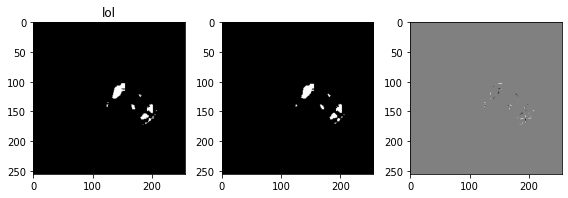

  1%|          | 1/103 [00:01<02:28,  1.46s/it]

TCGA-02-0086 DICE 0.956 Surf DICE 0.992


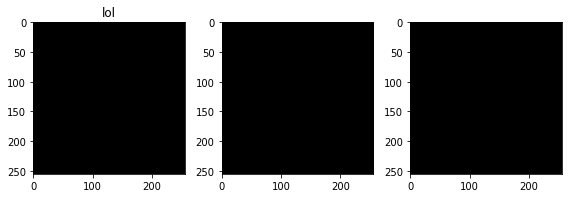

  2%|▏         | 2/103 [00:02<02:26,  1.45s/it]

TCGA-02-0102 DICE 0.649 Surf DICE 0.868


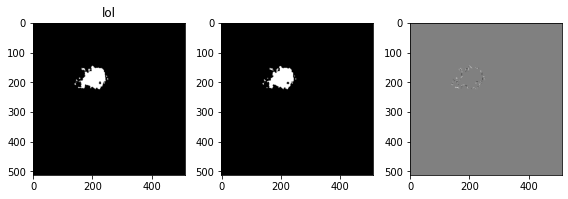

  3%|▎         | 3/103 [00:05<02:59,  1.80s/it]

TCGA-02-0059 DICE 0.954 Surf DICE 0.999


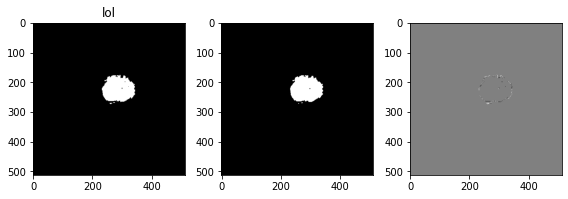

  4%|▍         | 4/103 [00:11<05:15,  3.19s/it]

TCGA-02-0069 DICE 0.966 Surf DICE 0.995


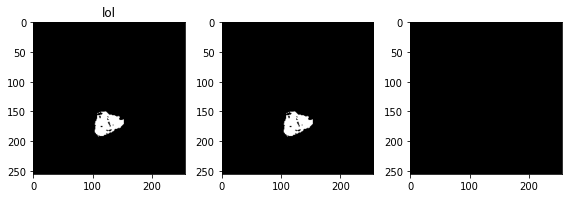

  5%|▍         | 5/103 [00:16<05:58,  3.66s/it]

TCGA-19-2624 DICE 1.0 Surf DICE 1.0


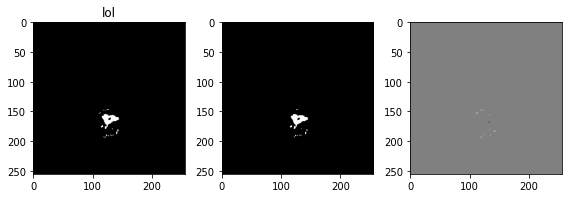

  6%|▌         | 6/103 [00:19<05:30,  3.41s/it]

TCGA-06-0182 DICE 0.965 Surf DICE 0.984


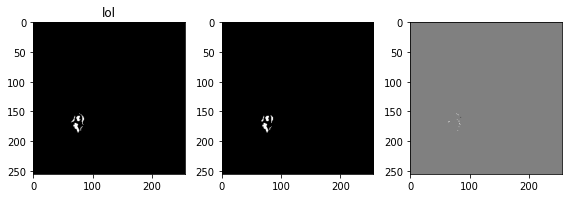

  7%|▋         | 7/103 [00:22<05:21,  3.35s/it]

TCGA-08-0360 DICE 0.953 Surf DICE 0.963


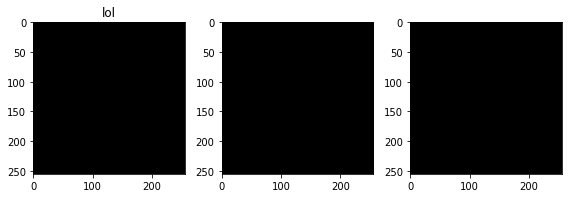

  8%|▊         | 8/103 [00:24<04:23,  2.78s/it]

TCGA-02-0006 DICE 0.742 Surf DICE 0.978
Different shapes of inverted and orig image:  (193, 256, 28) (192, 256, 28)


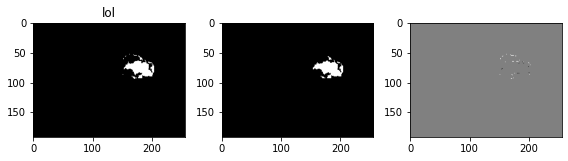

  9%|▊         | 9/103 [00:25<03:44,  2.39s/it]

TCGA-19-2631 DICE 0.968 Surf DICE 0.989


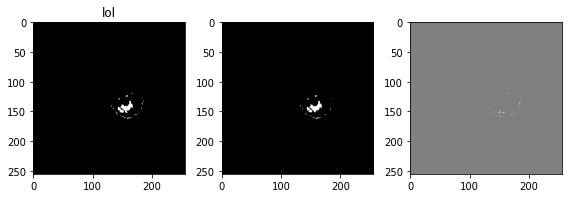

 10%|▉         | 10/103 [00:27<03:29,  2.25s/it]

TCGA-12-1094 DICE 0.943 Surf DICE 0.962


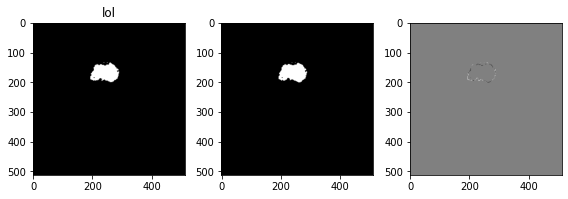

 11%|█         | 11/103 [00:31<04:11,  2.74s/it]

TCGA-06-2570 DICE 0.97 Surf DICE 0.997


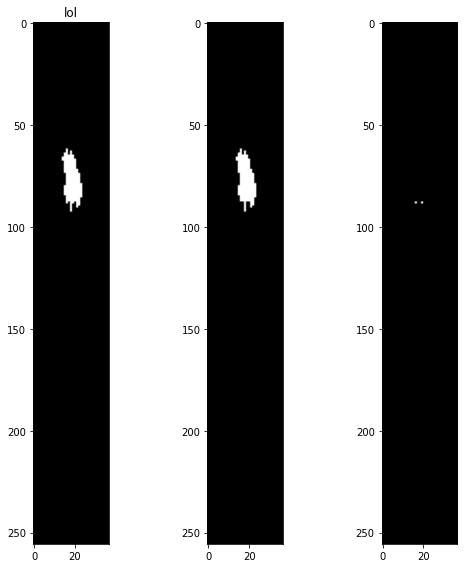

 12%|█▏        | 12/103 [00:33<03:57,  2.61s/it]

TCGA-06-0119 DICE 0.982 Surf DICE 0.992


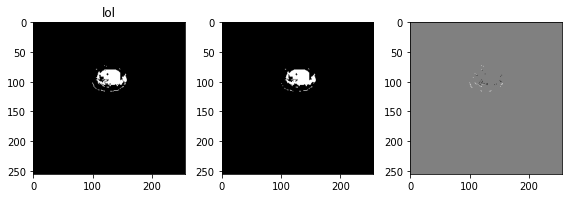

 13%|█▎        | 13/103 [00:36<03:46,  2.52s/it]

TCGA-06-0145 DICE 0.975 Surf DICE 0.989


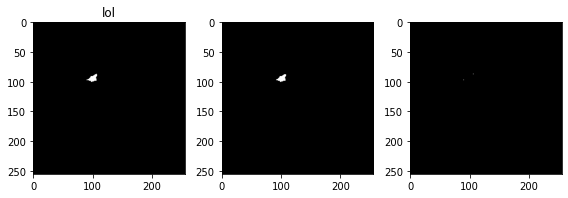

 14%|█▎        | 14/103 [00:39<04:05,  2.76s/it]

TCGA-08-0509 DICE 0.919 Surf DICE 0.882


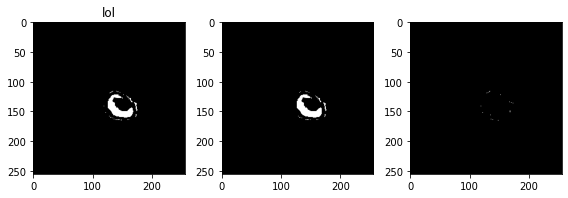

 15%|█▍        | 15/103 [00:41<03:55,  2.67s/it]

TCGA-06-5408 DICE 0.975 Surf DICE 0.981


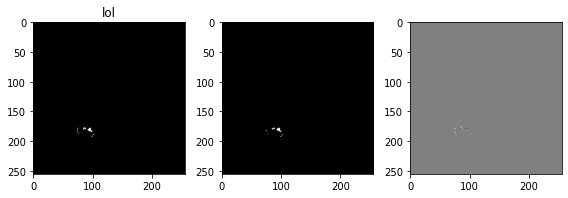

 16%|█▌        | 16/103 [00:43<03:21,  2.32s/it]

TCGA-02-0116 DICE 0.941 Surf DICE 0.973


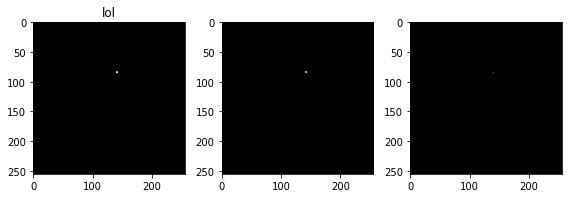

 17%|█▋        | 17/103 [00:45<03:22,  2.35s/it]

TCGA-06-0188 DICE 0.957 Surf DICE 1.0
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.560928 4.682784 6.243712]


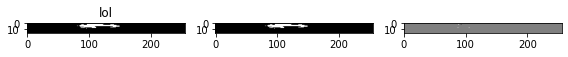

 17%|█▋        | 18/103 [00:47<03:00,  2.12s/it]

TCGA-76-6661 DICE 0.983 Surf DICE 0.991


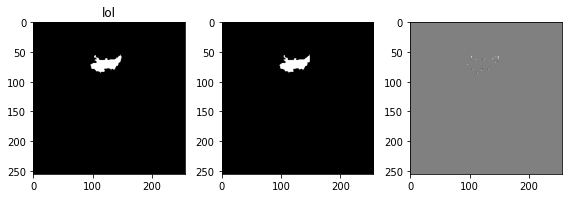

 18%|█▊        | 19/103 [00:48<02:40,  1.92s/it]

TCGA-02-0047 DICE 0.983 Surf DICE 1.0


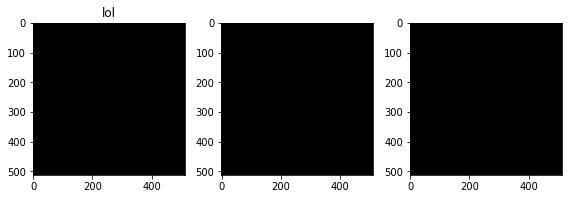

 19%|█▉        | 20/103 [00:51<02:52,  2.07s/it]

TCGA-12-3650 DICE 0.5 Surf DICE 0.918


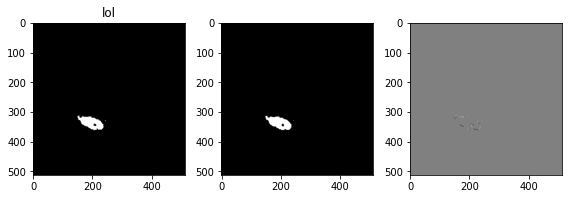

 20%|██        | 21/103 [00:57<04:22,  3.20s/it]

TCGA-02-0064 DICE 0.967 Surf DICE 0.992
Different shapes of inverted and orig image:  (241, 320, 27) (240, 320, 27)


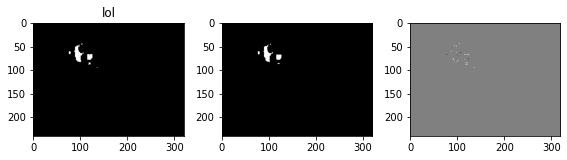

 21%|██▏       | 22/103 [00:58<03:40,  2.72s/it]

TCGA-14-1825 DICE 0.927 Surf DICE 0.988


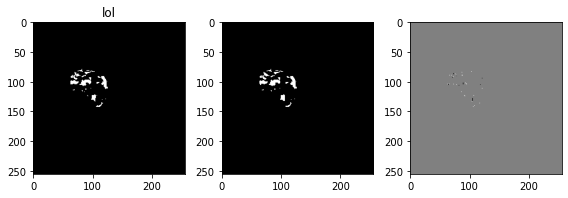

 22%|██▏       | 23/103 [01:00<03:25,  2.57s/it]

TCGA-06-0162 DICE 0.958 Surf DICE 0.993


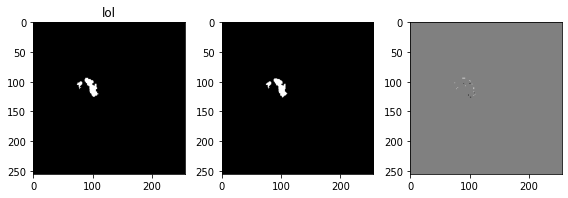

 23%|██▎       | 24/103 [01:02<02:55,  2.23s/it]

TCGA-02-0033 DICE 0.973 Surf DICE 0.999


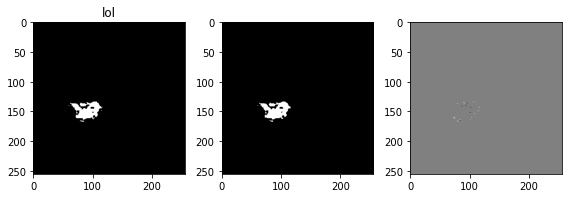

 24%|██▍       | 25/103 [01:05<03:06,  2.39s/it]

TCGA-08-0359 DICE 0.988 Surf DICE 0.984


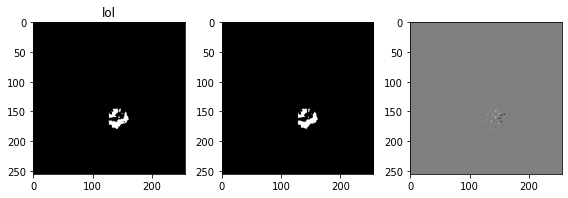

 25%|██▌       | 26/103 [01:06<02:42,  2.11s/it]

TCGA-02-0054 DICE 0.933 Surf DICE 0.991


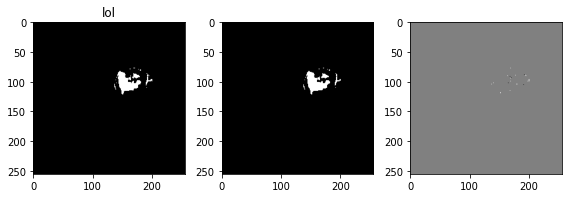

 26%|██▌       | 27/103 [01:09<02:51,  2.25s/it]

TCGA-06-0184 DICE 0.977 Surf DICE 0.993
Different shapes of inverted and orig image:  (321, 384, 24) (320, 384, 24)


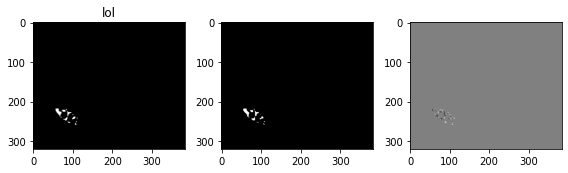

 27%|██▋       | 28/103 [01:11<02:42,  2.16s/it]

TCGA-12-1601 DICE 0.903 Surf DICE 0.992


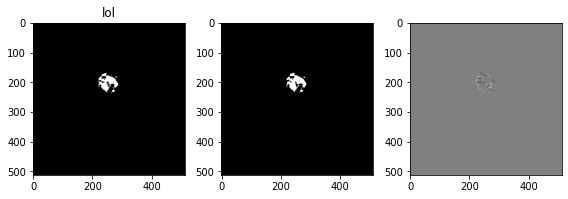

 28%|██▊       | 29/103 [01:15<03:26,  2.79s/it]

TCGA-06-5413 DICE 0.93 Surf DICE 0.994


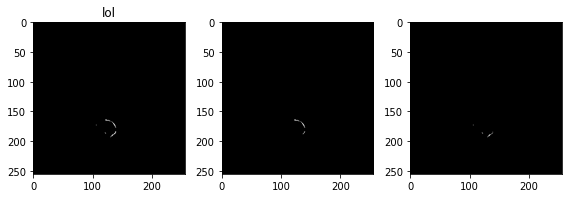

 29%|██▉       | 30/103 [01:17<03:10,  2.61s/it]

TCGA-76-6191 DICE 0.939 Surf DICE 0.939


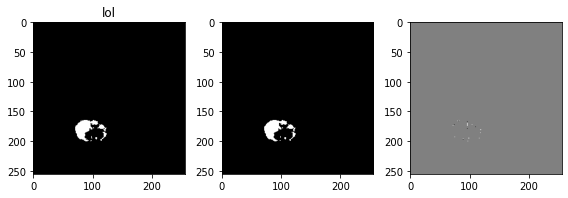

 30%|███       | 31/103 [01:19<02:47,  2.32s/it]

TCGA-02-0075 DICE 0.972 Surf DICE 0.997


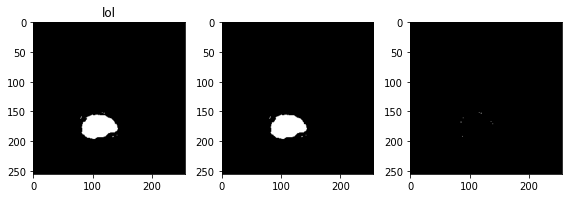

 31%|███       | 32/103 [01:21<02:48,  2.37s/it]

TCGA-06-0177 DICE 0.996 Surf DICE 0.993


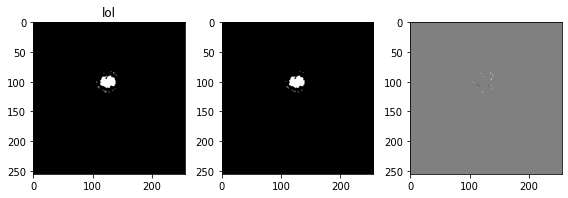

 32%|███▏      | 33/103 [01:23<02:45,  2.36s/it]

TCGA-06-0154 DICE 0.965 Surf DICE 0.978


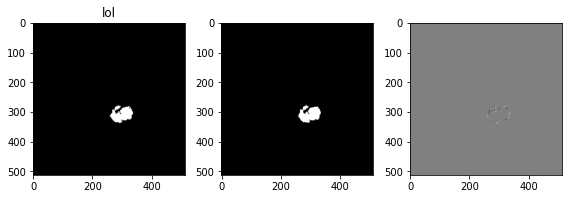

 33%|███▎      | 34/103 [01:28<03:22,  2.94s/it]

TCGA-06-0179 DICE 0.953 Surf DICE 0.996
Different shapes of inverted and orig image:  (241, 320, 31) (240, 320, 31)


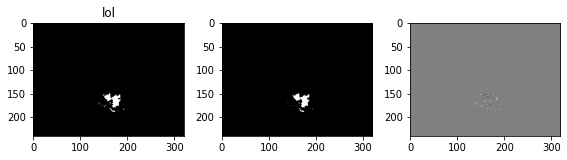

 34%|███▍      | 35/103 [01:29<02:50,  2.50s/it]

TCGA-19-5951 DICE 0.923 Surf DICE 0.976
Different shapes of inverted and orig image:  (193, 256, 20) (192, 256, 20)


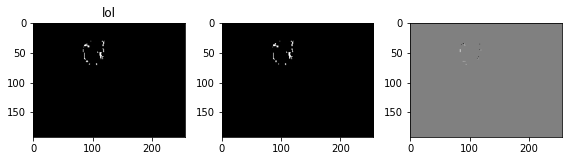

 35%|███▍      | 36/103 [01:31<02:23,  2.13s/it]

TCGA-12-1598 DICE 0.953 Surf DICE 0.972


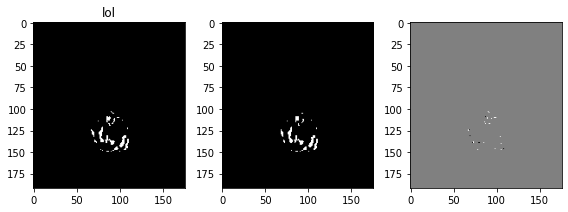

 36%|███▌      | 37/103 [01:33<02:27,  2.23s/it]

TCGA-12-0616 DICE 0.915 Surf DICE 0.974


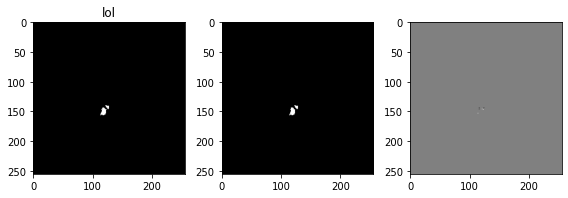

 37%|███▋      | 38/103 [01:35<02:14,  2.07s/it]

TCGA-02-0070 DICE 0.973 Surf DICE 0.994


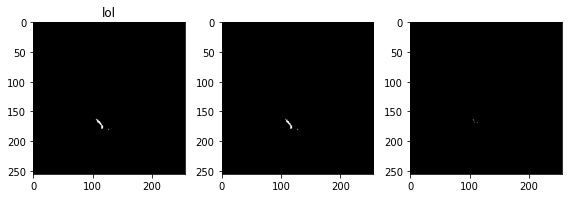

 38%|███▊      | 39/103 [01:37<02:16,  2.13s/it]

TCGA-06-1084 DICE 0.962 Surf DICE 0.996
Different shapes of inverted and orig image:  (385, 512, 23) (384, 512, 23)


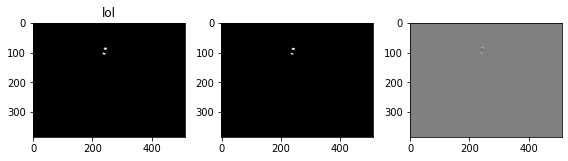

 39%|███▉      | 40/103 [01:39<02:07,  2.02s/it]

TCGA-12-0829 DICE 0.941 Surf DICE 0.999


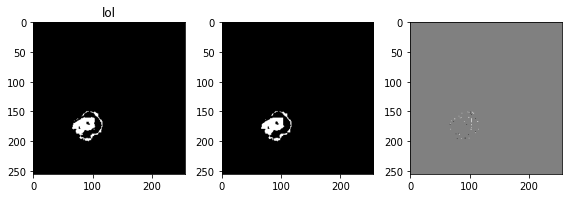

 40%|███▉      | 41/103 [01:40<01:58,  1.91s/it]

TCGA-76-4932 DICE 0.974 Surf DICE 0.988


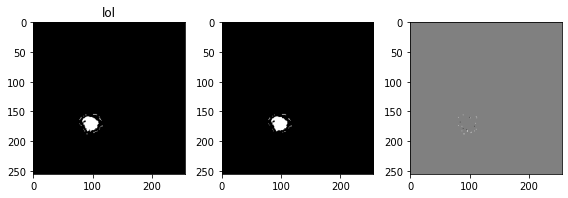

 41%|████      | 42/103 [01:42<01:51,  1.83s/it]

TCGA-02-0068 DICE 0.963 Surf DICE 0.99


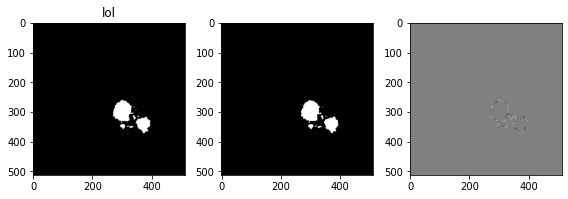

 42%|████▏     | 43/103 [01:48<02:58,  2.98s/it]

TCGA-76-6282 DICE 0.962 Surf DICE 0.997


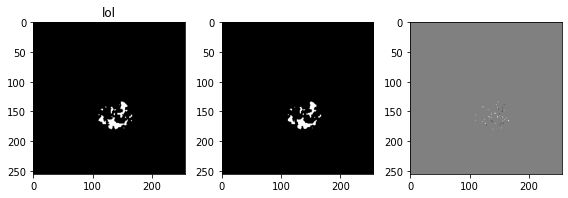

 43%|████▎     | 44/103 [01:51<02:58,  3.03s/it]

TCGA-08-0385 DICE 0.967 Surf DICE 0.972
Different shapes of inverted and orig image:  (512, 449, 72) (512, 448, 72)


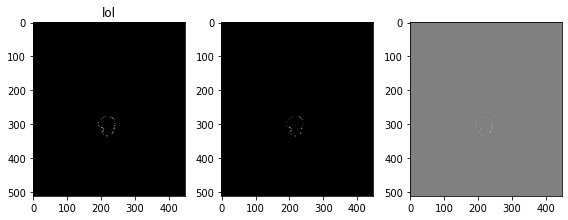

 44%|████▎     | 45/103 [01:54<03:03,  3.16s/it]

TCGA-12-1098 DICE 0.623 Surf DICE 0.958


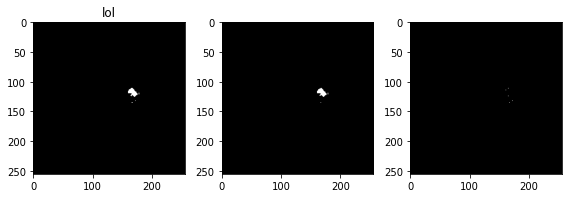

 45%|████▍     | 46/103 [01:57<02:59,  3.15s/it]

TCGA-08-0512 DICE 0.985 Surf DICE 0.987


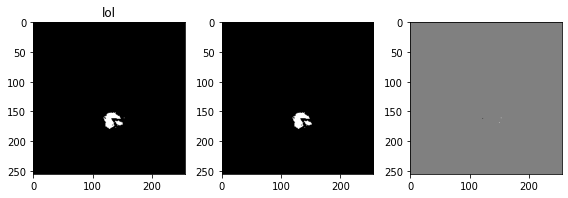

 46%|████▌     | 47/103 [02:01<02:56,  3.15s/it]

TCGA-08-0389 DICE 0.985 Surf DICE 0.977
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [2.5308914 5.061783  7.5926743]


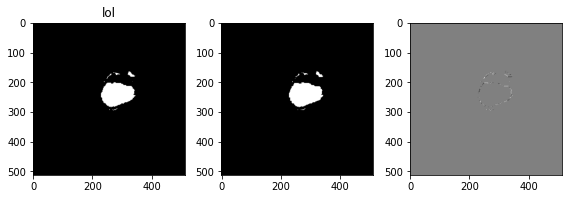

 47%|████▋     | 48/103 [02:03<02:40,  2.92s/it]

TCGA-14-1794 DICE 0.975 Surf DICE 0.995


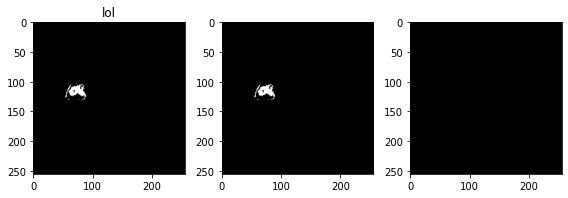

 48%|████▊     | 49/103 [02:07<03:03,  3.40s/it]

TCGA-19-1789 DICE 1.0 Surf DICE 1.0


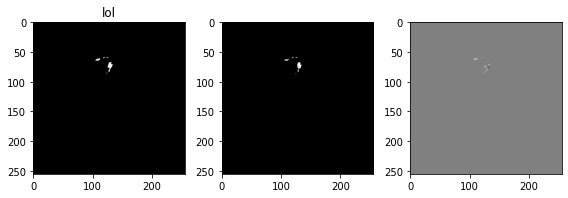

 49%|████▊     | 50/103 [02:09<02:28,  2.81s/it]

TCGA-02-0009 DICE 0.957 Surf DICE 0.999


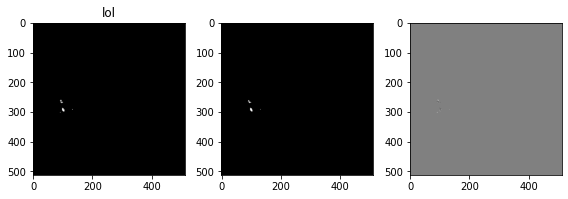

 50%|████▉     | 51/103 [02:13<02:45,  3.18s/it]

TCGA-06-0122 DICE 0.777 Surf DICE 0.965


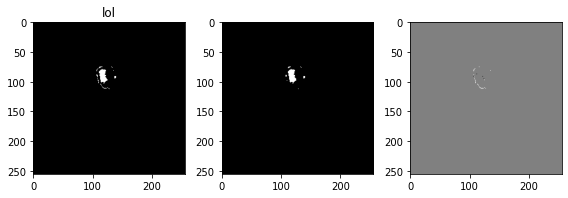

 50%|█████     | 52/103 [02:16<02:35,  3.04s/it]

TCGA-08-0355 DICE 0.937 Surf DICE 0.937


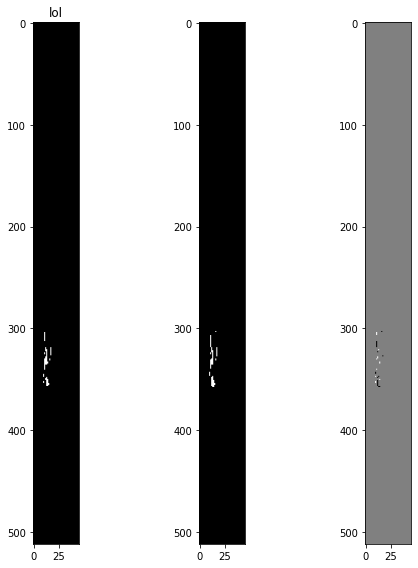

 51%|█████▏    | 53/103 [02:19<02:42,  3.26s/it]

TCGA-06-6389 DICE 0.811 Surf DICE 0.994


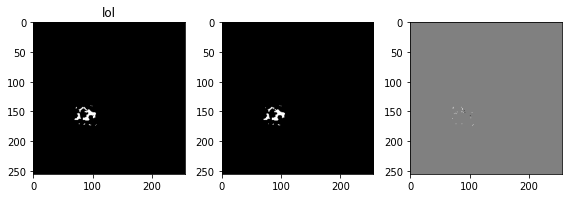

 52%|█████▏    | 54/103 [02:22<02:29,  3.05s/it]

TCGA-06-0190 DICE 0.957 Surf DICE 0.978


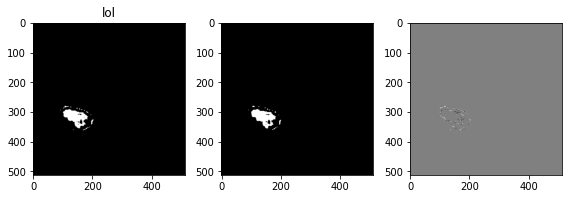

 53%|█████▎    | 55/103 [02:26<02:45,  3.44s/it]

TCGA-06-0192 DICE 0.922 Surf DICE 0.99


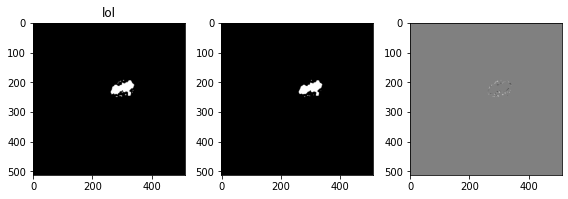

 54%|█████▍    | 56/103 [02:32<03:15,  4.16s/it]

TCGA-02-0027 DICE 0.935 Surf DICE 0.986


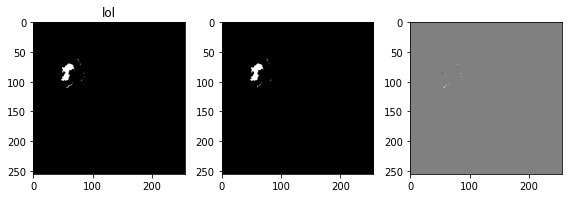

 55%|█████▌    | 57/103 [02:34<02:43,  3.56s/it]

TCGA-06-0137 DICE 0.959 Surf DICE 0.98


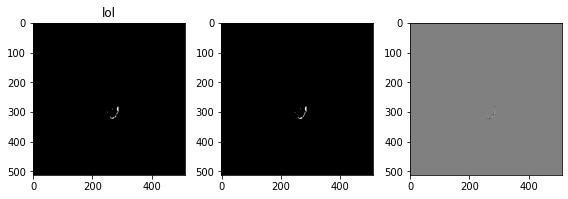

 56%|█████▋    | 58/103 [02:36<02:19,  3.11s/it]

TCGA-12-0776 DICE 0.829 Surf DICE 0.993
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [3.2803419 6.5606837 9.841025 ]


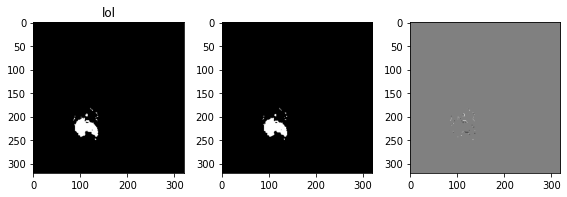

 57%|█████▋    | 59/103 [02:38<02:02,  2.79s/it]

TCGA-76-6657 DICE 0.95 Surf DICE 0.982


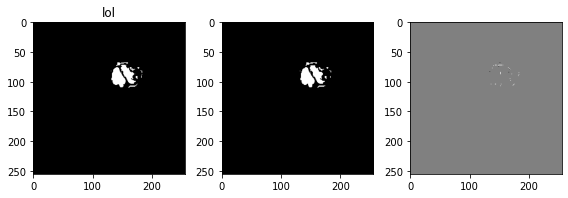

 58%|█████▊    | 60/103 [02:41<01:56,  2.71s/it]

TCGA-06-0176 DICE 0.981 Surf DICE 0.993


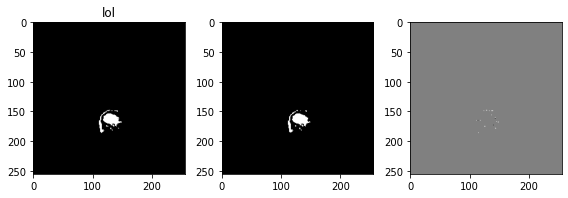

 59%|█████▉    | 61/103 [02:44<02:00,  2.86s/it]

TCGA-08-0356 DICE 0.975 Surf DICE 0.976
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.8251526 3.6503053 5.475458 ]


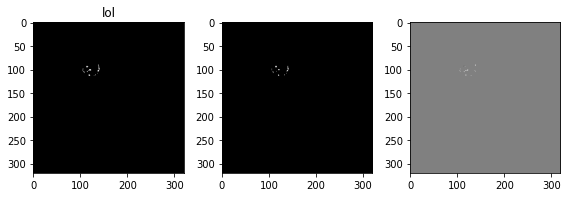

 60%|██████    | 62/103 [02:46<01:50,  2.69s/it]

TCGA-76-6662 DICE 0.847 Surf DICE 0.959


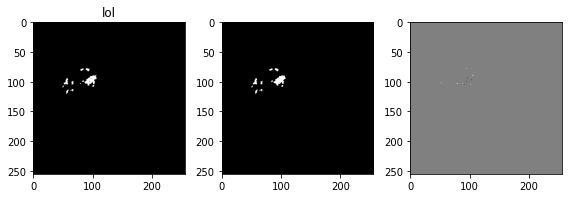

 61%|██████    | 63/103 [02:50<01:53,  2.83s/it]

TCGA-08-0522 DICE 0.952 Surf DICE 0.964


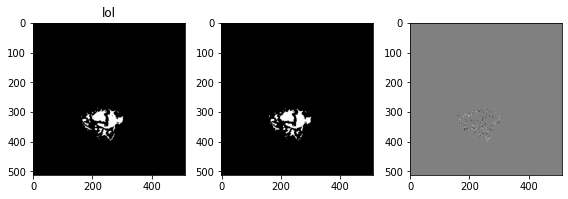

 62%|██████▏   | 64/103 [02:52<01:44,  2.69s/it]

TCGA-06-1802 DICE 0.922 Surf DICE 0.996


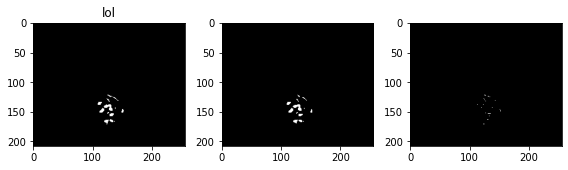

 63%|██████▎   | 65/103 [02:54<01:31,  2.41s/it]

TCGA-19-5960 DICE 0.953 Surf DICE 0.988


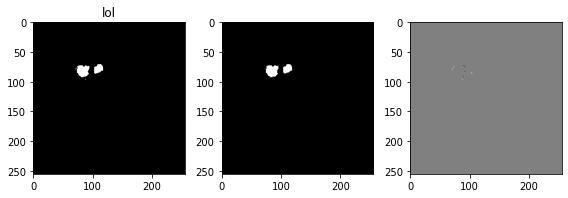

 64%|██████▍   | 66/103 [02:57<01:38,  2.67s/it]

TCGA-08-0390 DICE 0.981 Surf DICE 0.97


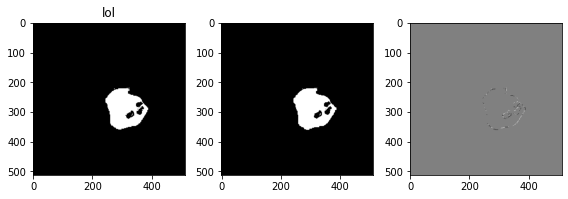

 65%|██████▌   | 67/103 [02:59<01:32,  2.58s/it]

TCGA-14-1456 DICE 0.982 Surf DICE 0.998


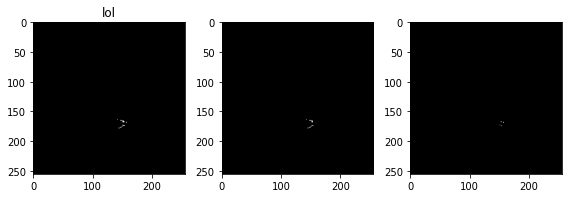

 66%|██████▌   | 68/103 [03:02<01:26,  2.48s/it]

TCGA-06-0158 DICE 0.856 Surf DICE 0.967


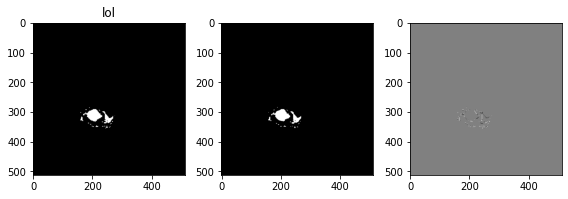

 67%|██████▋   | 69/103 [03:06<01:42,  3.02s/it]

TCGA-06-0139 DICE 0.915 Surf DICE 0.992


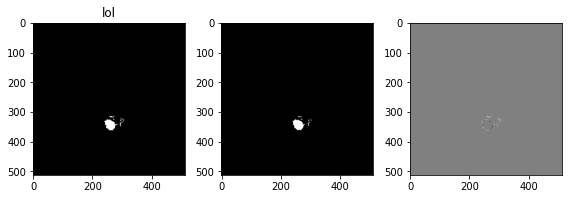

 68%|██████▊   | 70/103 [03:11<01:59,  3.61s/it]

TCGA-06-0238 DICE 0.905 Surf DICE 0.986
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.4778999 2.9557998 4.4336996]


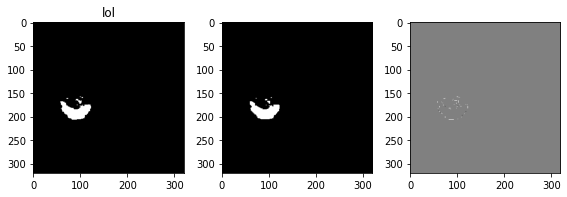

 69%|██████▉   | 71/103 [03:13<01:41,  3.18s/it]

TCGA-76-4935 DICE 0.976 Surf DICE 0.995
Different shapes of inverted and orig image:  (481, 512, 25) (480, 512, 25)


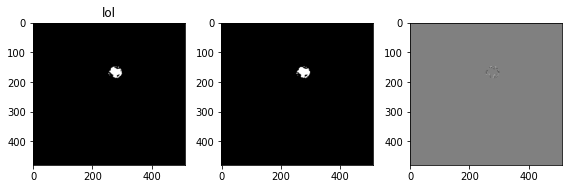

 70%|██████▉   | 72/103 [03:15<01:28,  2.85s/it]

TCGA-14-3477 DICE 0.894 Surf DICE 0.99


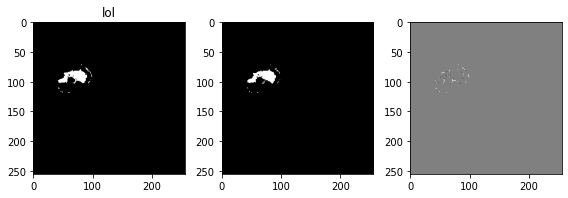

 71%|███████   | 73/103 [03:17<01:12,  2.43s/it]

TCGA-02-0106 DICE 0.954 Surf DICE 0.984


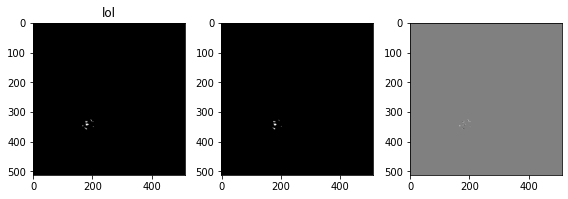

 72%|███████▏  | 74/103 [03:21<01:27,  3.01s/it]

TCGA-06-0644 DICE 0.786 Surf DICE 0.945


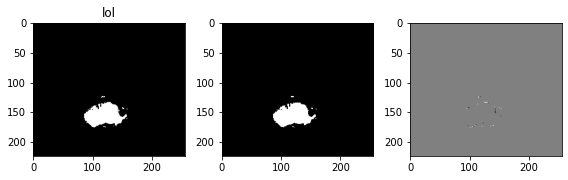

 73%|███████▎  | 75/103 [03:23<01:12,  2.59s/it]

TCGA-19-0963 DICE 0.991 Surf DICE 0.997


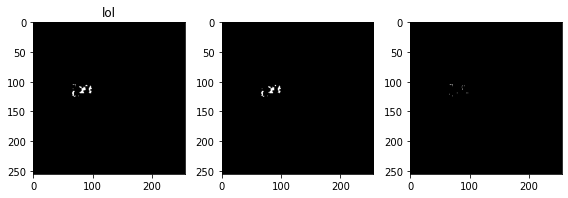

 74%|███████▍  | 76/103 [03:25<01:08,  2.55s/it]

TCGA-06-0187 DICE 0.937 Surf DICE 0.978
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.8178266 3.6356533 5.45348  ]


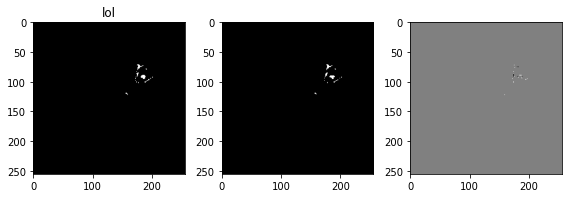

 75%|███████▍  | 77/103 [03:27<00:59,  2.29s/it]

TCGA-76-6664 DICE 0.881 Surf DICE 0.974
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [ 3.823199  7.646398 11.469597]


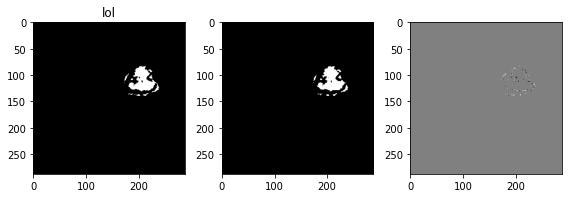

 76%|███████▌  | 78/103 [03:29<00:53,  2.15s/it]

TCGA-76-6663 DICE 0.974 Surf DICE 0.995


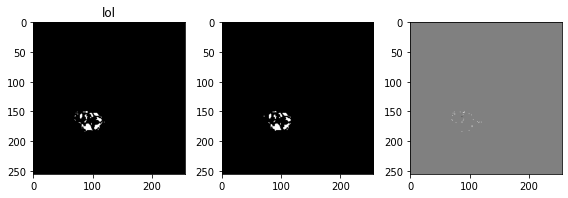

 77%|███████▋  | 79/103 [03:30<00:49,  2.07s/it]

TCGA-76-6285 DICE 0.969 Surf DICE 0.988
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.524298 3.048596 4.572894]


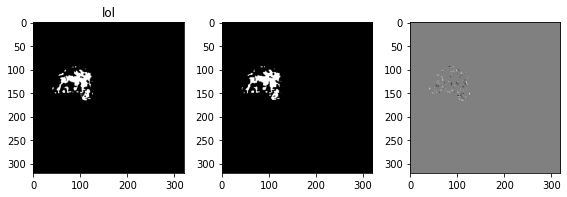

 78%|███████▊  | 80/103 [03:33<00:47,  2.08s/it]

TCGA-76-4934 DICE 0.947 Surf DICE 0.993


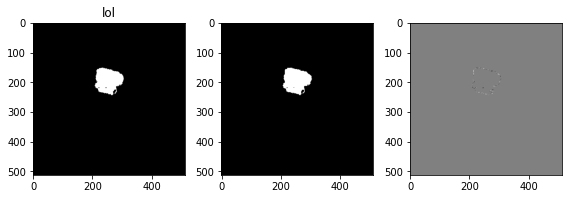

 79%|███████▊  | 81/103 [03:38<01:11,  3.24s/it]

TCGA-02-0087 DICE 0.974 Surf DICE 0.997


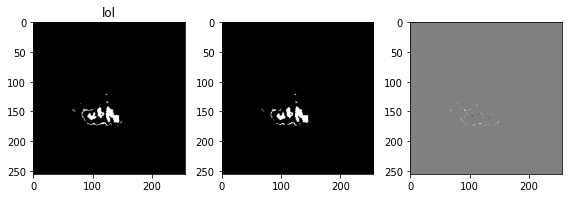

 80%|███████▉  | 82/103 [03:42<01:07,  3.23s/it]

TCGA-08-0392 DICE 0.949 Surf DICE 0.951


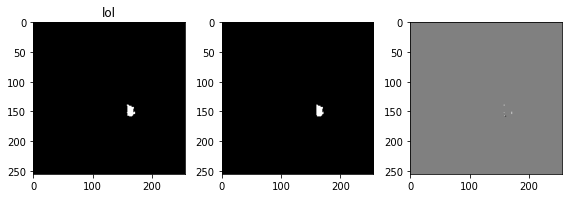

 81%|████████  | 83/103 [03:43<00:53,  2.67s/it]

TCGA-02-0085 DICE 0.963 Surf DICE 0.99


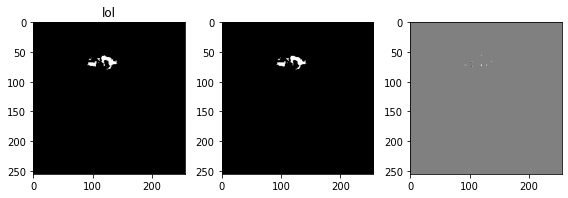

 82%|████████▏ | 84/103 [03:45<00:49,  2.58s/it]

TCGA-06-0185 DICE 0.982 Surf DICE 0.997


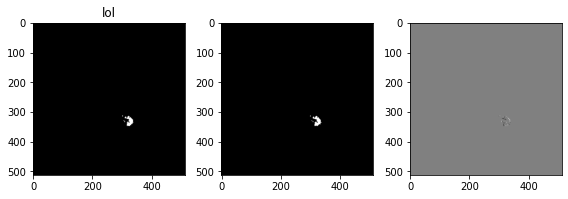

 83%|████████▎ | 85/103 [03:50<00:57,  3.20s/it]

TCGA-06-0130 DICE 0.903 Surf DICE 0.983


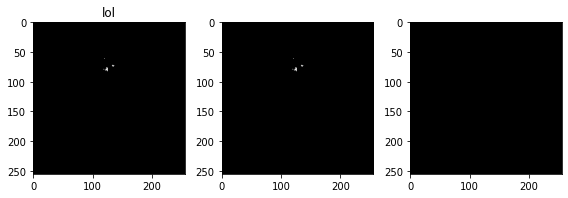

 83%|████████▎ | 86/103 [03:53<00:53,  3.13s/it]

TCGA-06-0240 DICE 1.0 Surf DICE 1.0


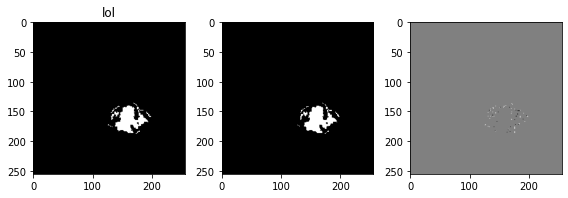

 84%|████████▍ | 87/103 [03:55<00:42,  2.64s/it]

TCGA-02-0034 DICE 0.966 Surf DICE 0.99


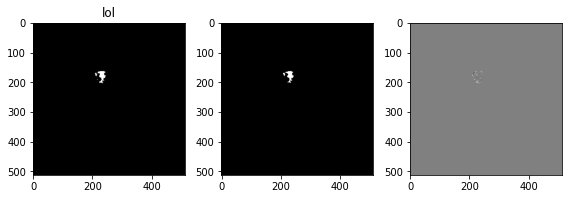

 85%|████████▌ | 88/103 [03:58<00:45,  3.02s/it]

TCGA-06-0149 DICE 0.915 Surf DICE 0.997


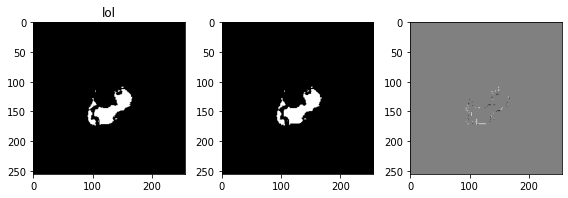

 86%|████████▋ | 89/103 [04:00<00:35,  2.56s/it]

TCGA-02-0011 DICE 0.973 Surf DICE 0.996


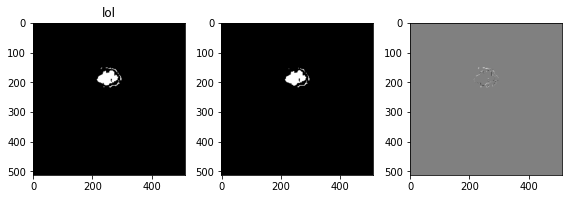

 87%|████████▋ | 90/103 [04:04<00:38,  2.99s/it]

TCGA-06-0138 DICE 0.932 Surf DICE 0.99


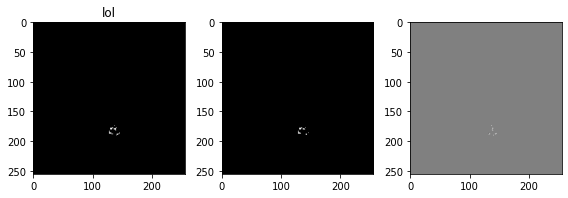

 88%|████████▊ | 91/103 [04:06<00:31,  2.64s/it]

TCGA-76-6280 DICE 0.938 Surf DICE 0.973


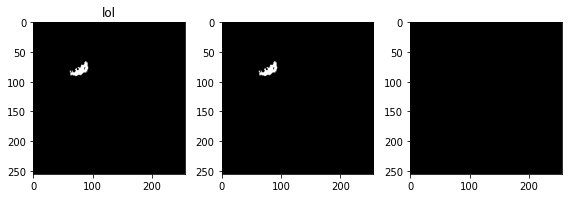

 89%|████████▉ | 92/103 [04:10<00:34,  3.13s/it]

TCGA-19-5954 DICE 1.0 Surf DICE 1.0


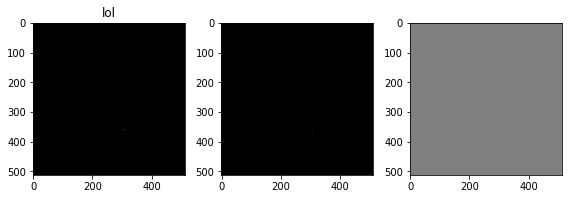

 90%|█████████ | 93/103 [04:16<00:39,  3.94s/it]

TCGA-76-6193 DICE 0.922 Surf DICE 0.996


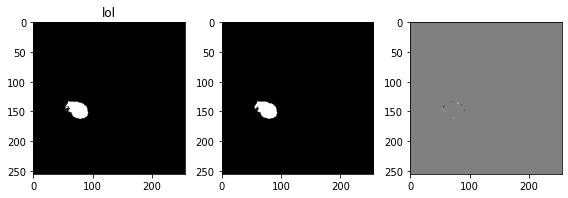

 91%|█████████▏| 94/103 [04:18<00:31,  3.45s/it]

TCGA-06-0164 DICE 0.992 Surf DICE 0.999


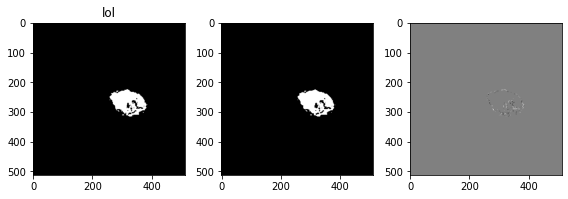

 92%|█████████▏| 95/103 [04:23<00:30,  3.87s/it]

TCGA-06-5417 DICE 0.953 Surf DICE 0.997


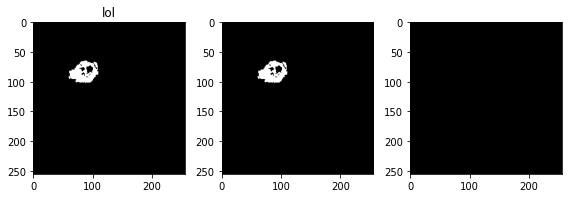

 93%|█████████▎| 96/103 [04:27<00:28,  4.02s/it]

TCGA-19-5958 DICE 1.0 Surf DICE 1.0
/anvar/public_datasets/preproc_study/gbm/orig/TCGA-08-0520/CT1_SEG.nii.gz
Untypical channels [1.9323565 3.864713  5.7970695]


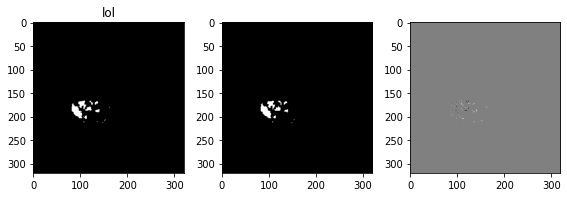

 94%|█████████▍| 97/103 [04:29<00:20,  3.41s/it]

TCGA-76-6656 DICE 0.925 Surf DICE 0.988


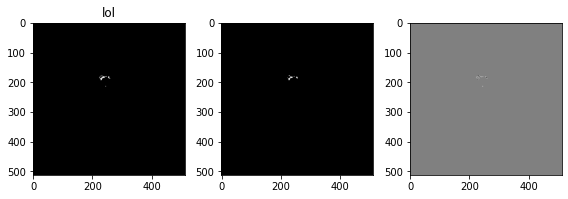

 95%|█████████▌| 98/103 [04:33<00:18,  3.62s/it]

TCGA-06-0646 DICE 0.749 Surf DICE 0.977


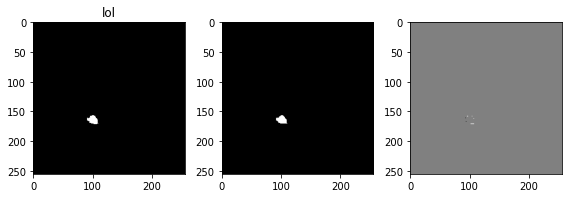

 96%|█████████▌| 99/103 [04:35<00:11,  2.97s/it]

TCGA-02-0046 DICE 0.892 Surf DICE 0.965
File /anvar/public_datasets/preproc_study/gbm/orig/logging.txt/CT1_SEG.nii.gz does not exist!


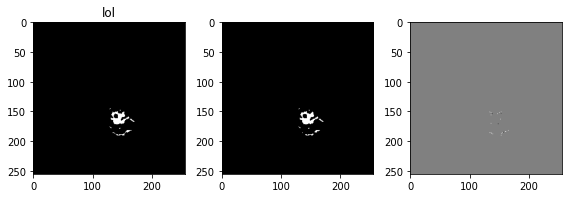

 98%|█████████▊| 101/103 [04:37<00:04,  2.43s/it]

TCGA-06-0142 DICE 0.952 Surf DICE 0.986


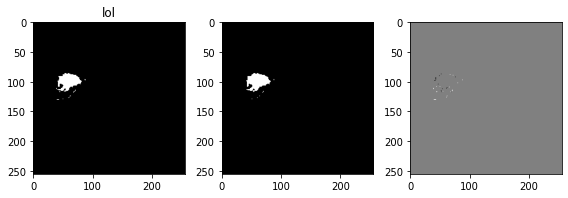

 99%|█████████▉| 102/103 [04:39<00:02,  2.14s/it]

TCGA-02-0037 DICE 0.973 Surf DICE 0.986


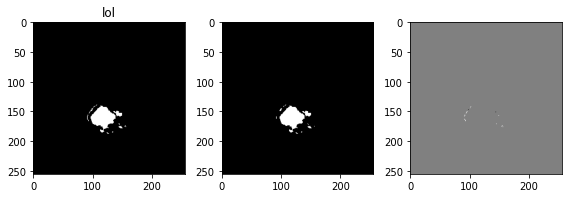

100%|██████████| 103/103 [04:42<00:00,  2.74s/it]

TCGA-08-0520 DICE 0.987 Surf DICE 0.968
TCGA-08-0520 102 Dice:  0.933 0.079 Surf. Dice:  0.982 0.022


In [339]:
res_folder = '/anvar/public_datasets/preproc_study/gbm/4a_resamp/'
orig_folder = '/anvar/public_datasets/preproc_study/gbm/orig/'
dices = []
s_dices = []
for patient in tqdm(os.listdir(res_folder)):
    try:
        
        
        img, channels = check_multiple_channels(orig_folder + patient + '/CT1_SEG.nii.gz')
        img = ants.reorient_image2(img, orientation = 'RPI')
        img_res = ants.image_read(res_folder + patient + '/CT1_SEG.nii.gz')
        img_res_reverse = invert_resample_by_channels(img_res, img)
        
        channel = channels[0]
        distances = metrics.compute_surface_distances((img[:,:,:]==channel),
                                                  (img_res_reverse[:,:,:]==channel), 
                                                  img.spacing)
        dice = metrics.compute_dice_coefficient((img[:,:,:]==channel), 
                                                (img_res_reverse[:,:,:]==channel))
        s_dice = metrics.compute_surface_dice_at_tolerance(distances, 1)
        
        dices.append(dice)
        s_dices.append(s_dice)
        plot_qc(img[:,:,:]==1, img_res_reverse[:,:,:]==1)
        plt.show()
        print(patient, 'DICE', np.round(dice,3), "Surf DICE", np.round(s_dice,3))
    except Exception as e:
            print(e)
            pass 
        
print(patient, len(dices), 'Dice: ',
          np.round(np.array(dices).mean(),3), 
          np.round(np.array(dices).std(),3), 'Surf. Dice: ',
          np.round(np.array(s_dices).mean(),3), np.round(np.array(s_dices).std(),3)) 

In [343]:
print(len(glob('/anvar/public_datasets/preproc_study/gbm/4a_resamp/' + '/**/T1.nii.gz')))
print(len(glob('/anvar/public_datasets/preproc_study/gbm/4a_resamp/' + '/**/T2.nii.gz')))
print(len(glob('/anvar/public_datasets/preproc_study/gbm/4a_resamp/' + '/**/FLAIR.nii.gz')))
print(len(glob('/anvar/public_datasets/preproc_study/gbm/4a_resamp/' + '/**/CT1.nii.gz')))

102
102
102
102


### Check the function in inference

##### 1. should take two paths as an input and return *json to the patient folder
##### 2. the naming of the json should incude experiment and fold
##### 3. 1_reg can be spoiled by the channels. should be checked

In [345]:
def pred_invert_resample(path_to_pred, path_to_orig, path_to_resampled):
    # path_to_pred = *npz, path_to_orig = *1_reg, path_to_resampled = *4a_resample
    # *.npz archives sometimes can be recognised wrong, if extracted and saved back at the same time
    data = np.load(path_to_pred, allow_pickle=True)['arr_0']
    
    # schw
    if np.shape(data)[0] != 3:
        old_orig = ants.image_read(path_to_resampled)
        new_orig = ants.image_read(path_to_orig)
        old_like = old_orig.new_image_like(data)
        new_img = ants.resample_image(old_like, new_orig.spacing, False, 0)
        output_file = new_img.numpy().astype('float16')
    
    # gbm and lgg
    elif len(np.shape(data)) > 3:
        data = data.transpose(0,3,2,1).astype('float32')

        old_orig_ct1 = ants.image_read(path_to_resampled)
        new_orig_ct1 = ants.image_read(path_to_orig)

        old_like_ch_0 = old_orig_ct1.new_image_like(data[0])
        old_like_ch_1 = old_orig_ct1.new_image_like(data[1])
        old_like_ch_2 = old_orig_ct1.new_image_like(data[2])

        new_img_0 = ants.resample_image(old_like_ch_0, new_orig_ct1, False, 0)
        new_img_1 = ants.resample_image(old_like_ch_1, new_orig_ct1, False, 0)
        new_img_2 = ants.resample_image(old_like_ch_2, new_orig_ct1, False, 0)

        new_img_shape =  new_img_2.numpy().shape

        new_array = np.zeros(tuple([3] + list(new_img_shape)), dtype='float16')
        new_array[0] = new_img_0.numpy()
        new_array[1] = new_img_1.numpy()
        new_array[2] = new_img_2.numpy()
        output_file = new_array.transpose(0,3,2,1).astype('float16')
    

    return (output_file)

In [ ]:
def pred_invert_resample(path_to_pred, path_to_orig, path_to_resampled):
# *.npz archives sometimes can be recognised wrong, if extracted and saved back at the same time
    data = np.load(path_to_pred, allow_pickle=True)
    data = data['arr_0'].transpose(0,3,2,1).astype('float32')

    old_orig_ct1 = ants.image_read(path_to_resampled)
    new_orig_ct1 = ants.image_read(path_to_orig)

    old_like_ch_0 = old_orig_ct1.new_image_like(data[0])
    old_like_ch_1 = old_orig_ct1.new_image_like(data[1])
    old_like_ch_2 = old_orig_ct1.new_image_like(data[2])

    new_img_0 = ants.resample_image(old_like_ch_0, new_orig_ct1.spacing, False, 0)
    new_img_1 = ants.resample_image(old_like_ch_1, new_orig_ct1.spacing, False, 0)
    new_img_2 = ants.resample_image(old_like_ch_2, new_orig_ct1.spacing, False, 0)

    new_img_shape =  new_img_2.numpy().shape

    new_array = np.zeros(tuple([3] + list(new_img_shape)), dtype='float16')
    new_array[0] = new_img_0.numpy()
    new_array[1] = new_img_1.numpy()
    new_array[2] = new_img_2.numpy()

    return (new_array.transpose(0,3,2,1).astype('float16'))
                            

## GBM for 3a_atlas from file

In [53]:
sub_list = os.listdir('/anvar/public_datasets/preproc_study/gbm/3a_atlas/')

In [ ]:
1. посмотрю на всех пациентов качество до преобразования
2. после преобразования, надо искать

In [73]:
img_orig

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 128)
	 Spacing    : (1.0156, 1.0156, 1.5)
	 Origin     : (129.4911, 84.5891, -55.4454)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

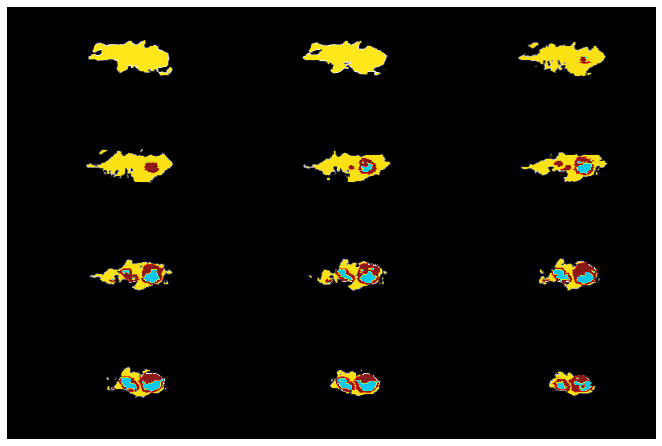

In [80]:
sub = sub_list[65]
img = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/'+ sub +'/CT1_SEG.nii.gz')

img_orig = ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/'+ sub +'/CT1_SEG.nii.gz')
img_orig = ants.reorient_image2(img_orig, orientation = 'RPI')

img_to_sri = ants.registration(fixed=img_orig, moving=img, type_of_transform='Rigid')
img_fixed_res = ants.apply_transforms(img_orig, img, img_to_sri['fwdtransforms'][0])

# img_fixed_res = ants.apply_transforms(img_orig, img, whichtoinvert=[True],
#                                       transformlist = '/anvar/public_datasets/preproc_study/gbm/3a_atlas/'+ sub +'/T1C_to_SRI_inv.mat')
# img_fixed_res = ants.reorient_image2(img_fixed_res, orientation = 'RPI')

ants.plot(img_fixed_res, img_orig)

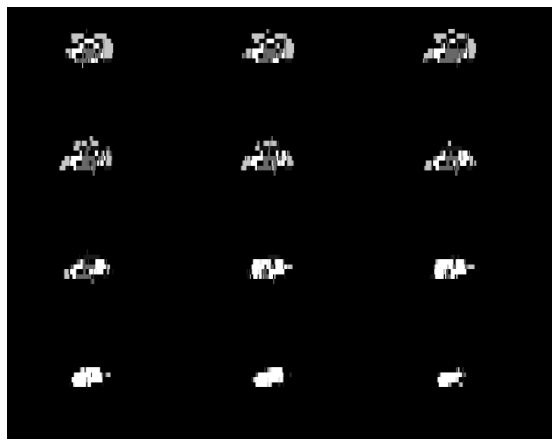

In [57]:
ants.plot(img_fixed_res)

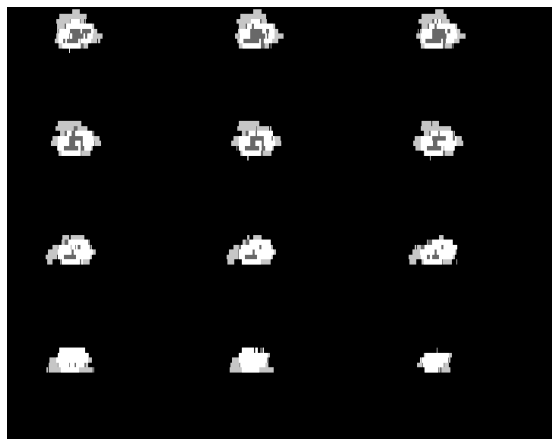

In [58]:
ants.plot(img_orig)

In [50]:
np.allclose(img_orig.numpy(), img_fixed_res.numpy())

False